In [1]:
import pandas as pd
import csv
import numpy as np
import os
from pyecharts.charts import Map

In [30]:
meta_file = "/home/soniali/Desktop/02_china_recom_renew/0_raw_data/Qualified_china_meta.csv"
output_path = "/home/soniali/Desktop/02_china_recom_renew/1_epi/"
lineage_file = "/home/soniali/Desktop/02_china_recom_renew/0_raw_data/representative_lineages.csv"
lineage_count_file = output_path+"china_lineage_num.csv"
date_intervals_day = 10

In [31]:
# 筛选出符合采集时间范围的样本ID
df=pd.read_csv(meta_file,delimiter=',')
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

print(df.shape) # 3064
dict_lineage_hebing = {}
with open(lineage_file) as csvfile:
    csv_reader = csv.reader(csvfile)  
    for row in csv_reader:
        if row[0] != 'Representative_ancestors':
            lineage_after = row[0]
            linaege_before = row[1].replace(' ','').split(',')
            dict_lineage_hebing[lineage_after] = linaege_before


(39456, 7)


In [32]:
# 在上面新建的一列中填入合并后的谱系
df["merged_lineage"] = np.nan
for k,v in dict_lineage_hebing.items():
    for i in v:
        df.loc[(df.Lineage == i) ,'merged_lineage'] = k          

# not_include = []
# for i in df.index:
#     if df.loc[i,'merged_lineage'] not in dict_lineage_hebing.keys():
#         not_include.append(df.loc[i,'Lineage'] )

# not_include_number =  {}
# for lin in not_include:
#     not_include_number[lin] = not_include.count(lin)

# dict1_sorted_values = sorted(not_include_number.items(),key = lambda x:x[1],reverse = True)
# print(dict1_sorted_values)
# for i in dict1_sorted_values:
#     print(i[0])
# # print(dict1_sorted_values.keys())

print(df["merged_lineage"].value_counts())
df_number= df["merged_lineage"].value_counts()
if sum(list(df_number)) == df.shape[0]:
    # df_number.to_csv(lineage_count_file,mode='w')
    print(df_number)
    print("The total number ",str(df.shape[0]))
else:
    print("please check and add the new lineages")

merged_lineage
BA.5.2.48*     11410
EG.5.1*         6036
BF.7.14*        5432
XBB.1.9.1*      3892
XBB.1.16*       3842
Others          3810
XBB.1.5*        1908
XBB.1.22.1*     1847
BA.2.75*        1071
Name: count, dtype: int64
please check and add the new lineages


In [33]:
df

Virus Strain Name      Accession_ID    Lineage   
0      hCoV-19/Hong Kong/VZ22358954/2022  EPI_ISL_16077175   CH.1.1.3  \
1      hCoV-19/Hong Kong/VZ22358955/2022  EPI_ISL_16077176       BF.7   
2      hCoV-19/Hong Kong/VZ22358956/2022  EPI_ISL_16077177  BA.5.2.13   
3      hCoV-19/Hong Kong/VZ22358964/2022  EPI_ISL_16077178  BQ.1.1.14   
4      hCoV-19/Hong Kong/VZ22358975/2022  EPI_ISL_16077179   CH.1.1.3   
...                                  ...               ...        ...   
39451     hCoV-19/Henan/HBCDC-CX104/2023  EPI_ISL_18543051       HK.3   
39452     hCoV-19/Henan/HBCDC-CX105/2023  EPI_ISL_18543052     HK.3.2   
39453     hCoV-19/Henan/HBCDC-CX106/2023  EPI_ISL_18543053       HK.3   
39454     hCoV-19/Henan/HBCDC-CX108/2023  EPI_ISL_18543054       HK.2   
39455     hCoV-19/Henan/HBCDC-CX109/2023  EPI_ISL_18543055   EG.5.1.1   

      Sample_Collection_Date country   province  city merged_lineage  
0                  12/1/2022   China  Hong Kong   NaN       BA.2.75*  
1                  12/1/2022   China  Hong Kong   NaN         Others  
2                  12/1/2022   China  Hong Kong   NaN         Others  
3                  12/1/2022   China  Hong Kong   NaN            NaN  
4                  12/1/2022   China  Hong Kong   NaN       BA.2.75*  
...                      ...     ...        ...   ...            ...  
39451             10/26/2023   China      Henan  Hebi        EG.5.1*  
39452             10/26/2023   China      Henan  Hebi        EG.5.1*  
39453             10/26/2023   China      Henan  Hebi        EG.5.1*  
39454             10/26/2023   China      Henan  Hebi        EG.5.1*  
39455             10/26/2023   China      Henan  Hebi        EG.5.1*  

[39456 rows x 8 columns]

In [34]:
df['date'] = pd.to_datetime(df['Sample_Collection_Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df.to_csv("/home/soniali/Desktop/02_china_recom_renew/0_raw_data/Qualified_china_meta_merged.csv", index = False)

In [35]:
# 筛选出符合采集时间范围的样本ID
meta_file = "/home/soniali/Desktop/02_china_recom_renew/0_raw_data/Qualified_china_meta_merged.csv"
df=pd.read_csv(meta_file,delimiter=',')
df['date'] = pd.to_datetime(df['Sample_Collection_Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_number= df["merged_lineage"].value_counts()
df_number.to_csv(lineage_count_file,mode='w')

In [36]:
dstart, dend = df['date'].sort_values().values[0], df['date'].sort_values().values[-1]
date_intervals = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]

In [38]:
#标签按照lineage比例排序,others放最后
lin_rank = df_number.index.tolist()
lin_rank.remove("Others")
lin_rank.append("Others")
select_lin_num = len(lin_rank)
top8_lineages = lin_rank[:select_lin_num]

# 计算每个谱系每天有多少序列
bars = {}
for i in range(select_lin_num):
    bars["top"+str(i+1)] = []

for l, i in enumerate(bars):
    if i != 'Others':
        df_toplin = df[df['merged_lineage'] == top8_lineages[l]]
    else:
        df_toplin = df[~df['merged_lineage'].isin(top8_lineages)]
        
    for n in range(len(date_intervals)):        
        if n != len(date_intervals)-1:
            count = len(df_toplin[
                (df_toplin['date'] >= date_intervals[n]) 
                & (df_toplin['date'] < date_intervals[n + 1])
                ])

        else:
            count = len(df_toplin[
                df_toplin['date'] >= date_intervals[n]
                ])
        bars[i].append(count)

# 计算所有谱系之和，每天总共有多少序列
list_lable = []
for i in range(0,len(bars['top1'])):
    list_lable.append(0)
    for k,v in bars.items():
        list_lable[i] += v[i]

if sum(list_lable) == sum(list(df_number)):
    print("The total genome number is :",str(sum(list_lable)))
    ylim = int(max(list_lable)+max(list_lable)/10)
else:
    print("Something Error!")
    print(sum(list_lable))
    print(sum(list(df_number)))


The total genome number is : 39456


In [39]:
encluded_lineage = df_number.index.tolist()
encluded_lineage.remove("Others")
encluded_lineage


['BA.5.2.48*',
 'EG.5.1*',
 'BF.7.14*',
 'XBB.1.16*',
 'XBB.1.9.1*',
 'XBB.1.5*',
 'XBB.1.22.1*',
 'BA.2.75*']

In [40]:
df

Virus_Strain_Name      Accession_ID  Lineage   
0          hCoV-19/Henan/HBCDC-CX109/2023  EPI_ISL_18543055  HK.27.1  \
1          hCoV-19/Henan/HBCDC-CX108/2023  EPI_ISL_18543054     HK.2   
2          hCoV-19/Henan/HBCDC-CX106/2023  EPI_ISL_18543053     HK.3   
3          hCoV-19/Henan/HBCDC-CX105/2023  EPI_ISL_18543052   HK.3.2   
4          hCoV-19/Henan/HBCDC-CX104/2023  EPI_ISL_18543051     HK.3   
...                                   ...               ...      ...   
39451  SARS-CoV-2/human/Beijing/3090/2022  EPI_ISL_16350952     DY.2   
39452  SARS-CoV-2/human/Beijing/3089/2022  EPI_ISL_16350949  BF.7.14   
39453  SARS-CoV-2/human/Beijing/3088/2022  EPI_ISL_16350948     DY.2   
39454  SARS-CoV-2/human/Beijing/3087/2022  EPI_ISL_16350947     DY.2   
39455  SARS-CoV-2/human/Beijing/3086/2022  EPI_ISL_16350946     DY.2   

      Sample_Collection_Date country province  city merged_lineage        date  
0                 10/26/2023   China    Henan  Hebi        EG.5.1*  2023-10-26  
1                 10/26/2023   China    Henan  Hebi        EG.5.1*  2023-10-26  
2                 10/26/2023   China    Henan  Hebi        EG.5.1*  2023-10-26  
3                 10/26/2023   China    Henan  Hebi        EG.5.1*  2023-10-26  
4                 10/26/2023   China    Henan  Hebi        EG.5.1*  2023-10-26  
...                      ...     ...      ...   ...            ...         ...  
39451              12/1/2022   China  Beijing   NaN     BA.5.2.48*  2022-12-01  
39452              12/1/2022   China  Beijing   NaN       BF.7.14*  2022-12-01  
39453              12/1/2022   China  Beijing   NaN     BA.5.2.48*  2022-12-01  
39454              12/1/2022   China  Beijing   NaN     BA.5.2.48*  2022-12-01  
39455              12/1/2022   China  Beijing   NaN     BA.5.2.48*  2022-12-01  

[39456 rows x 9 columns]

In [41]:
for i in df.index:
    if df.loc[i,"province"] == "Inner mongolia":
        df.loc[i,"province"] = "Inner Mongolia"
    elif df.loc[i,"province"] == "Xinjiang corps":
        df.loc[i,"province"] = "Xinjiang"
    elif df.loc[i,"province"] == "Harbin":
        df.loc[i,"province"] = "Heilongjiang"
    elif df.loc[i,"province"] == "Tibet":
        df.loc[i,"province"] = "Xizang"
    elif df.loc[i,"province"] == "Nanning":
        df.loc[i,"province"] = "Guangxi"
        
cities_english = set(df.province.tolist())

In [42]:
set(list(df.province))

{'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Xinjiang',
 'Xizang',
 'Yunnan',
 'Zhejiang'}

In [43]:
cities_EC = {'Anhui':'安徽省','Beijing':'北京市','Chongqing':'重庆市','Fujian':'福建省','Gansu':'甘肃省','Guangdong':'广东省','Guangxi':'广西壮族自治区','Guizhou':'贵州省','Hainan':'海南省','Hebei':'河北省','Heilongjiang':'黑龙江省','Henan':'河南省','Hong Kong':'香港省','Hubei':'湖北省','Hunan':'湖南省','Inner Mongolia':'内蒙古自治区','Jiangsu':'江苏省','Jiangxi':'江西省','Jilin':'吉林省','Liaoning':'辽宁省','Ningxia':'宁夏回族自治区','Qinghai':'青海省','Shandong':'山东省','Shanghai':'上海市','Shanxi':'山西省','Shaanxi':'陕西省','Sichuan':'四川省','Taiwan':'台湾省','Tianjin':'天津市','Xinjiang':'新疆维吾尔族自治区','Xizang':'西藏自治区','Yunnan':'云南省','Zhejiang':'浙江省'}

city_genome = {}
for city in set(list(df.province)):
    df_city = df[df['province'] == city]
    city_genome[cities_EC[city]] = df_city.shape[0]

In [44]:
city_genome

{'山西省': 538,
 '贵州省': 106,
 '天津市': 255,
 '青海省': 357,
 '江西省': 951,
 '北京市': 1001,
 '江苏省': 1318,
 '河北省': 644,
 '湖南省': 80,
 '湖北省': 2456,
 '香港省': 641,
 '海南省': 457,
 '西藏自治区': 2,
 '新疆维吾尔族自治区': 1267,
 '辽宁省': 326,
 '吉林省': 196,
 '广东省': 1945,
 '黑龙江省': 1254,
 '台湾省': 962,
 '重庆市': 188,
 '浙江省': 1311,
 '广西壮族自治区': 268,
 '陕西省': 295,
 '甘肃省': 1063,
 '福建省': 2636,
 '上海市': 9274,
 '四川省': 2862,
 '内蒙古自治区': 207,
 '山东省': 1185,
 '河南省': 1650,
 '安徽省': 1736,
 '云南省': 1965,
 '宁夏回族自治区': 60}

In [45]:
sum(city_genome.values())

39456

## 绘制省市谱系热图

In [46]:
all_province = set(df["province"].tolist())
# top8_lineages.remove("Others")

In [47]:
province_lineage = {}
for p in all_province:
    province_lineage[p] = {}
province_all = {}
for p in all_province:
    df1 = df[df["province"] == p]
    province_all[p] = df1.shape[0]
    for l in top8_lineages:
        df2 = df1[df1["merged_lineage"] == l]
        province_lineage[p][l] = df2.shape[0]

In [48]:
df_heatmap = pd.DataFrame(columns=list(all_province),index=top8_lineages )
for l in df_heatmap.index:
    for p in all_province:
        df_heatmap.loc[l,p] = province_lineage[p][l]/province_all[p]

In [49]:
for i in df_heatmap.index:
    for j in df_heatmap.loc[i,]:
        if type(j) != float:
            print(j)

df_heatmap_plot = pd.DataFrame(df_heatmap, dtype="float")
df_heatmap_plot

Shanxi   Guizhou   Tianjin   Qinghai   Jiangxi   Beijing   
BA.5.2.48*   0.371747  0.339623  0.396078  0.190476  0.197687  0.178821  \
EG.5.1*      0.109665  0.377358  0.043137  0.114846  0.028391  0.005994   
BF.7.14*     0.260223  0.103774  0.392157  0.056022  0.055731  0.473526   
XBB.1.16*    0.046468  0.056604  0.015686  0.033613  0.238696  0.049950   
XBB.1.9.1*   0.085502  0.037736  0.039216  0.246499  0.303891  0.071928   
XBB.1.5*     0.022305  0.000000  0.003922  0.016807  0.065195  0.040959   
XBB.1.22.1*  0.026022  0.000000  0.003922  0.011204  0.023134  0.009990   
BA.2.75*     0.020446  0.009434  0.011765  0.000000  0.025237  0.020979   
Others       0.057621  0.075472  0.094118  0.330532  0.062040  0.147852   

              Jiangsu     Hebei   Hunan     Hubei  ...     Gansu    Fujian   
BA.5.2.48*   0.187405  0.507764  0.7750  0.519951  ...  0.460019  0.359256  \
EG.5.1*      0.039454  0.000000  0.0000  0.176303  ...  0.144873  0.169575   
BF.7.14*     0.203338  0.411491  0.0875  0.052117  ...  0.049859  0.180577   
XBB.1.16*    0.078149  0.000000  0.0000  0.024430  ...  0.025400  0.070182   
XBB.1.9.1*   0.061457  0.004658  0.0000  0.088355  ...  0.121355  0.086874   
XBB.1.5*     0.173748  0.001553  0.0000  0.028502  ...  0.081844  0.024279   
XBB.1.22.1*  0.141123  0.000000  0.0000  0.081433  ...  0.028222  0.025417   
BA.2.75*     0.029590  0.000000  0.0000  0.005700  ...  0.009407  0.015554   
Others       0.085736  0.074534  0.1375  0.023208  ...  0.079022  0.068285   

             Shanghai   Sichuan  Inner Mongolia  Shandong     Henan     Anhui   
BA.5.2.48*   0.080332  0.202306        0.386473  0.419409  0.401212  0.334677  \
EG.5.1*      0.265150  0.387142        0.000000  0.000000  0.199394  0.079493   
BF.7.14*     0.044317  0.085255        0.516908  0.410127  0.117576  0.178571   
XBB.1.16*    0.233341  0.047869        0.000000  0.000000  0.051515  0.047811   
XBB.1.9.1*   0.083351  0.165618        0.000000  0.000000  0.109697  0.032834   
XBB.1.5*     0.078930  0.030398        0.024155  0.000000  0.017576  0.053571   
XBB.1.22.1*  0.088419  0.018868        0.000000  0.000000  0.033939  0.129608   
BA.2.75*     0.021242  0.013627        0.000000  0.005063  0.006667  0.008065   
Others       0.104917  0.048917        0.072464  0.165401  0.062424  0.135369   

               Yunnan   Ningxia  
BA.5.2.48*   0.223919  0.633333  
EG.5.1*      0.210687  0.000000  
BF.7.14*     0.048855  0.266667  
XBB.1.16*    0.124682  0.000000  
XBB.1.9.1*   0.198982  0.000000  
XBB.1.5*     0.054453  0.000000  
XBB.1.22.1*  0.034606  0.000000  
BA.2.75*     0.037150  0.000000  
Others       0.066667  0.100000  

[9 rows x 33 columns]

In [50]:
for p in all_province:
    print(sum(df_heatmap[p]))


1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999


In [51]:
df_heatmap_plot_T = df_heatmap_plot.T
df_heatmap_plot_T.to_csv(output_path+"region_lin_frequency_heatmap.csv")

# Run region_lin_frequency_heatmap.r in R studio

## 绘制全国地图

In [52]:
city_genome

{'山西省': 538,
 '贵州省': 106,
 '天津市': 255,
 '青海省': 357,
 '江西省': 951,
 '北京市': 1001,
 '江苏省': 1318,
 '河北省': 644,
 '湖南省': 80,
 '湖北省': 2456,
 '香港省': 641,
 '海南省': 457,
 '西藏自治区': 2,
 '新疆维吾尔族自治区': 1267,
 '辽宁省': 326,
 '吉林省': 196,
 '广东省': 1945,
 '黑龙江省': 1254,
 '台湾省': 962,
 '重庆市': 188,
 '浙江省': 1311,
 '广西壮族自治区': 268,
 '陕西省': 295,
 '甘肃省': 1063,
 '福建省': 2636,
 '上海市': 9274,
 '四川省': 2862,
 '内蒙古自治区': 207,
 '山东省': 1185,
 '河南省': 1650,
 '安徽省': 1736,
 '云南省': 1965,
 '宁夏回族自治区': 60}

In [53]:
city_genome.pop("上海市")

9274

In [54]:
preserve_province = ['Shanghai',"Guangdong","Sichuan","Fujian","Hubei","Yunnan","Henan","Xinjiang","Anhui","Jiangsu","Heilongjiang","Gansu"\
    "Zhejiang","Beijing","Shandong","Taiwan","Jiangxi"]
for i in df.index:
    if df.loc[i,"province"] in preserve_province:
        continue
    else:
        df.loc[i,"province"] = "Others"

# df.to_csv('/home/soniali/Desktop/02_china_recom/0_raw_data/Qualified_china_meta_merged2.txt',index = None)

In [55]:
sum(list(city_genome.values()))


30182

In [56]:
df_sample = pd.DataFrame(columns=["region","name","value"])
df_sample["region"] = ["China"]*len(city_genome)
df_sample["name"] = list(city_genome.keys())
df_sample["value"] = list(city_genome.values())
df_sample.to_csv(output_path+"China_except_sh.csv",index=None)

# Run region_lin_frequency_heatmap.r in R studio

In [30]:
# from pyecharts.charts import Map
# from pyecharts import options as opts
# from pyecharts.faker import Faker
# import os
# import numpy

# city_lin = list(city_genome.keys())
# values2 = list(city_genome.values())
# # values2 = numpy.log(list(city_genome.values()))
# max_num = max(values2)
# c = (
#     Map()
#     .add("china", [list(z) for z in zip(city_lin, values2)],maptype="china",is_map_symbol_show=False,)
#     .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) #不显示标签（城市名）
#     .set_global_opts(
#         title_opts=opts.TitleOpts(title="China_except_sh"), visualmap_opts=opts.VisualMapOpts(max_=max_num,is_piecewise=False,range_color=["#F0F0F0", "#DF0101"]),
#         # title_opts=opts.TitleOpts(title="China"), visualmap_opts=opts.VisualMapOpts(range_color=["#FBEFEF", "#DF0101"]),
#     )
#     .render(output_path+"China_except_sh"+str(date_intervals_day)+"d.html")
# )

In [57]:
cities_chinese = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang']
cities_EC = {'Anhui':'安徽省','Beijing':'北京市','Chongqing':'重庆市','Fujian':'福建省','Gansu':'甘肃省','Guangdong':'广东省','Guangxi':'广西壮族自治区','Guizhou':'贵州省','Hainan':'海南省','Hebei':'河北省','Heilongjiang':'黑龙江省','Henan':'河南省','Hong Kong':'香港省','Hubei':'湖北省','Hunan':'湖南省','Inner Mongolia':'内蒙古自治区','Jiangsu':'江苏省','Jiangxi':'江西省','Jilin':'吉林省','Liaoning':'辽宁省','Ningxia':'宁夏回族自治区','Qinghai':'青海省','Shandong':'山东省','Shanghai':'上海市','Shanxi':'山西省','Shaanxi':'陕西省','Sichuan':'四川省','Taiwan':'台湾省','Tianjin':'天津市','Xinjiang':'新疆维吾尔族自治区','Xizang':'西藏自治区','Yunnan':'云南省','Zhejiang':'浙江省'}

lin_city_num = {}
for lin in encluded_lineage:
    lin_city_num[lin] = {}
    for city in cities_english:
        lin_city_num[lin][cities_EC[city]] = 0

for city in cities_english:
    df_city = df[df['province'] == city]
    for i in df_city.index:
        lin = df_city.loc[i,"merged_lineage"]
        if lin != "Others":
            lin_city_num[lin][cities_EC[city]] += 1



In [58]:
lin_color = {}
color_list = ["#82ADCF","#4F72B1","#F0B26D","#F4D586","#B7D7E9","#5D9488","#9372A9","#C5432E","#9C9A99"]
lin_list = ['BA.5.2.48*', 'BF.7.14*', 'BA.2.75*', 'XBB.1.5*', 'XBB.1.9.1*', 'XBB.1.22.1*', 'XBB.1.16*', 'EG.5.1*',"Others"]

num = 0
for lin in lin_list:
    lin_color[lin] = color_list[num]
    num+=1

lin_color

{'BA.5.2.48*': '#82ADCF',
 'BF.7.14*': '#4F72B1',
 'BA.2.75*': '#F0B26D',
 'XBB.1.5*': '#F4D586',
 'XBB.1.9.1*': '#B7D7E9',
 'XBB.1.22.1*': '#5D9488',
 'XBB.1.16*': '#9372A9',
 'EG.5.1*': '#C5432E',
 'Others': '#9C9A99'}

In [59]:
lin_color[lin]

'#9C9A99'

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# plt.cla()
fig, ax = plt.subplots(1, 1, figsize=(100,50), dpi=300)
# colors = ["#C5432E","#82ADCF","#5D9488","#F0B26D","#9372A9","#F4D586","#4F72B1","#B7D7E9","#9C9A99"]
for i in range(select_lin_num):
    if i == 0:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars["top1"], label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
    elif i == 1:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars["top2"], bottom=bars["top1"], label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(bars["top1"], bars["top2"]).tolist()
    else:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars["top"+str(i+1)], bottom=accumu_height, label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(accumu_height, bars["top"+str(i+1)]).tolist()

plt.legend(fontsize=60)
plt.xticks([date_intervals[n] for n in range(len(date_intervals)) if n % round(len(date_intervals) / date_intervals_day) == 0])

plt.yticks(size=90,weight='bold')
plt.xticks(size=70)

plt.ylim(0, ylim) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=15,ha='right',fontweight = "bold")
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.tick_params(width=8,length=15)

plt.title('Temporal distribution in China',size=120, fontdict={'family': 'Songti SC', 'weight': 'bold'})        #设置标题
plt.ylabel('Genomes',size=90, fontdict={'family': 'Songti SC', 'weight': 'bold'})

plt.savefig(output_path+"lineage_china_"+str(date_intervals_day)+"day.pdf")

plt.show()

findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans.


In [61]:
all_top = list(set(bars.keys()))
bars_prop = {}
for n in all_top:
    bars_prop[n] = []

for i in range(len(bars["top1"])):
    temp_n = []
    for n in all_top:
        temp_n.append(bars[n][i])
    pp = [a/sum(temp_n) for a in temp_n]
    for b in range(len(all_top)):
        bars_prop[all_top[b]].append(pp[b])

for n in range(len(bars_prop["top9"])):
    num = 0
    for top in all_top:
        num+=bars_prop[top][n]
    print(num)

1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0


In [62]:
import matplotlib.pyplot as plt
import numpy as np

# plt.cla()
fig, ax = plt.subplots(1, 1, figsize=(100,50), dpi=300)
accumu_height = []
for i in range(select_lin_num):
    if i == 0:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars_prop["top1"], label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
    elif i == 1:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars_prop["top2"], bottom=bars_prop["top1"], label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(bars_prop["top1"], bars_prop["top2"]).tolist()
    else:
        lin = top8_lineages[i]
        plt.bar(date_intervals, bars_prop["top"+str(i+1)], bottom=accumu_height, label=lin, color=lin_color[lin], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(accumu_height, bars_prop["top"+str(i+1)]).tolist()

plt.legend(fontsize=60)
plt.xticks([date_intervals[n] for n in range(len(date_intervals)) if n % round(len(date_intervals) / 10) == 0])

plt.yticks(size=90,weight='bold')
plt.xticks(size=70)
plt.ylim(0, 1.01) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=15,ha='right',fontweight = "bold")

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.tick_params(width=8,length=15)
plt.title('Temporal distribution in China',size=120, fontdict={'family': 'Songti SC', 'weight': 'bold'}) 

plt.ylabel('Frequency',size=90, fontdict={'family': 'Songti SC', 'weight': 'bold'})
plt.savefig(output_path+"lineage_china_prop_"+str(date_intervals_day)+"day.pdf")
plt.show()

In [63]:
top8_lineages = ["BA.5.2.48*","BF.7.14*","BA.2.75*","XBB.1.5*","XBB.1.9.1*","XBB.1.22.1*","XBB.1.16*","EG.5.1*"]
top8_lin = top8_lineages[:8]

In [64]:
import os
os.mkdir(output_path+"world_covspectrum/")
#绘制top6谱系的增长曲线图
top8_lin = top8_lineages[:8]
df1 = df.sort_values(by="date" , ascending=True)
dstart, dend = df1['date'].sort_values().values[0], df1['date'].sort_values().values[-1]
date_intervals = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % 1 == 0]

date_lin_prop = {}
for day in date_intervals:
    date_lin_prop[day] = {}
    for lin in top8_lin:
        date_lin_prop[day][lin] = 0
        
for day in date_intervals:
    df_day = df1[df1["date"] == day]
    if df_day.shape[0] != 0:
        df_top1 = df_day[df_day["merged_lineage"] == top8_lin[0]]
        for i in range(len(top8_lin)):
            date_lin_prop[day][top8_lin[i]] = (df_day[df_day["merged_lineage"] == top8_lin[i]]).shape[0]/df_day.shape[0]
    else:
        for i in range(len(top8_lin)):
            date_lin_prop[day][top8_lin[i]] = 0

df_prop = pd.DataFrame(columns=["date","proportion","variant"])
df_prop.date = [val for val in date_intervals for i in range(len(top8_lin))]
df_prop.variant = top8_lin*len(date_intervals)

for i in df_prop.index:
    day = df_prop.loc[i,"date"]
    lin = df_prop.loc[i,"variant"]
    df_prop.loc[i,"proportion"] = date_lin_prop[day][lin]

df_prop.to_csv(output_path+"world_covspectrum/Top6_china.csv",index=None)

In [65]:
# df_prop = pd.read_csv("/home/soniali/Desktop/02_china_recom/1_epi/world_covspectrum/Top6_china.csv")
df_prop

date proportion      variant
0     2022-12-01   0.597015   BA.5.2.48*
1     2022-12-01   0.241791     BF.7.14*
2     2022-12-01   0.020896     BA.2.75*
3     2022-12-01        0.0     XBB.1.5*
4     2022-12-01        0.0   XBB.1.9.1*
...          ...        ...          ...
2675  2023-10-31        0.0     XBB.1.5*
2676  2023-10-31        0.0   XBB.1.9.1*
2677  2023-10-31        0.0  XBB.1.22.1*
2678  2023-10-31        0.0    XBB.1.16*
2679  2023-10-31        1.0      EG.5.1*

[2680 rows x 3 columns]

In [66]:
from numpy import *
import matplotlib.pyplot as plt  
os.chdir(os.getcwd()+"/")

def nihe(x, y, deg, color):
    parameter = np.polyfit(x, y, deg)
    p = np.poly1d(parameter)
    plt.plot(x, p(x), color=color)
    
    
def bord_line(ax, bwith, line_color):
    ax.spines['top'].set_color(line_color)  
    ax.spines['right'].set_color(line_color)
    ax.spines['left'].set_color(line_color)
    ax.spines['bottom'].set_color(line_color)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    
    
dstart, dend = df_prop['date'].sort_values().values[0], df_prop['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_prop_week = pd.DataFrame(columns=["date","proportion","variant"])
df_prop_week.date = [val for val in date_intervals_top4 for i in range(len(top8_lin))]
df_prop_week.variant = top8_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_prop[df_prop['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_prop[df_prop['date'] >= date_intervals_top4[n]]
    for lin in top8_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_prop_week.index:
            if df_prop_week.loc[i,"variant"] == lin and df_prop_week.loc[i,"date"] == date_intervals_top4[n]:
                df_prop_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

In [67]:
df_prop_week
max(df_prop_week.proportion)

0.9253051259491938

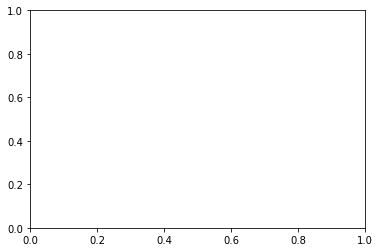

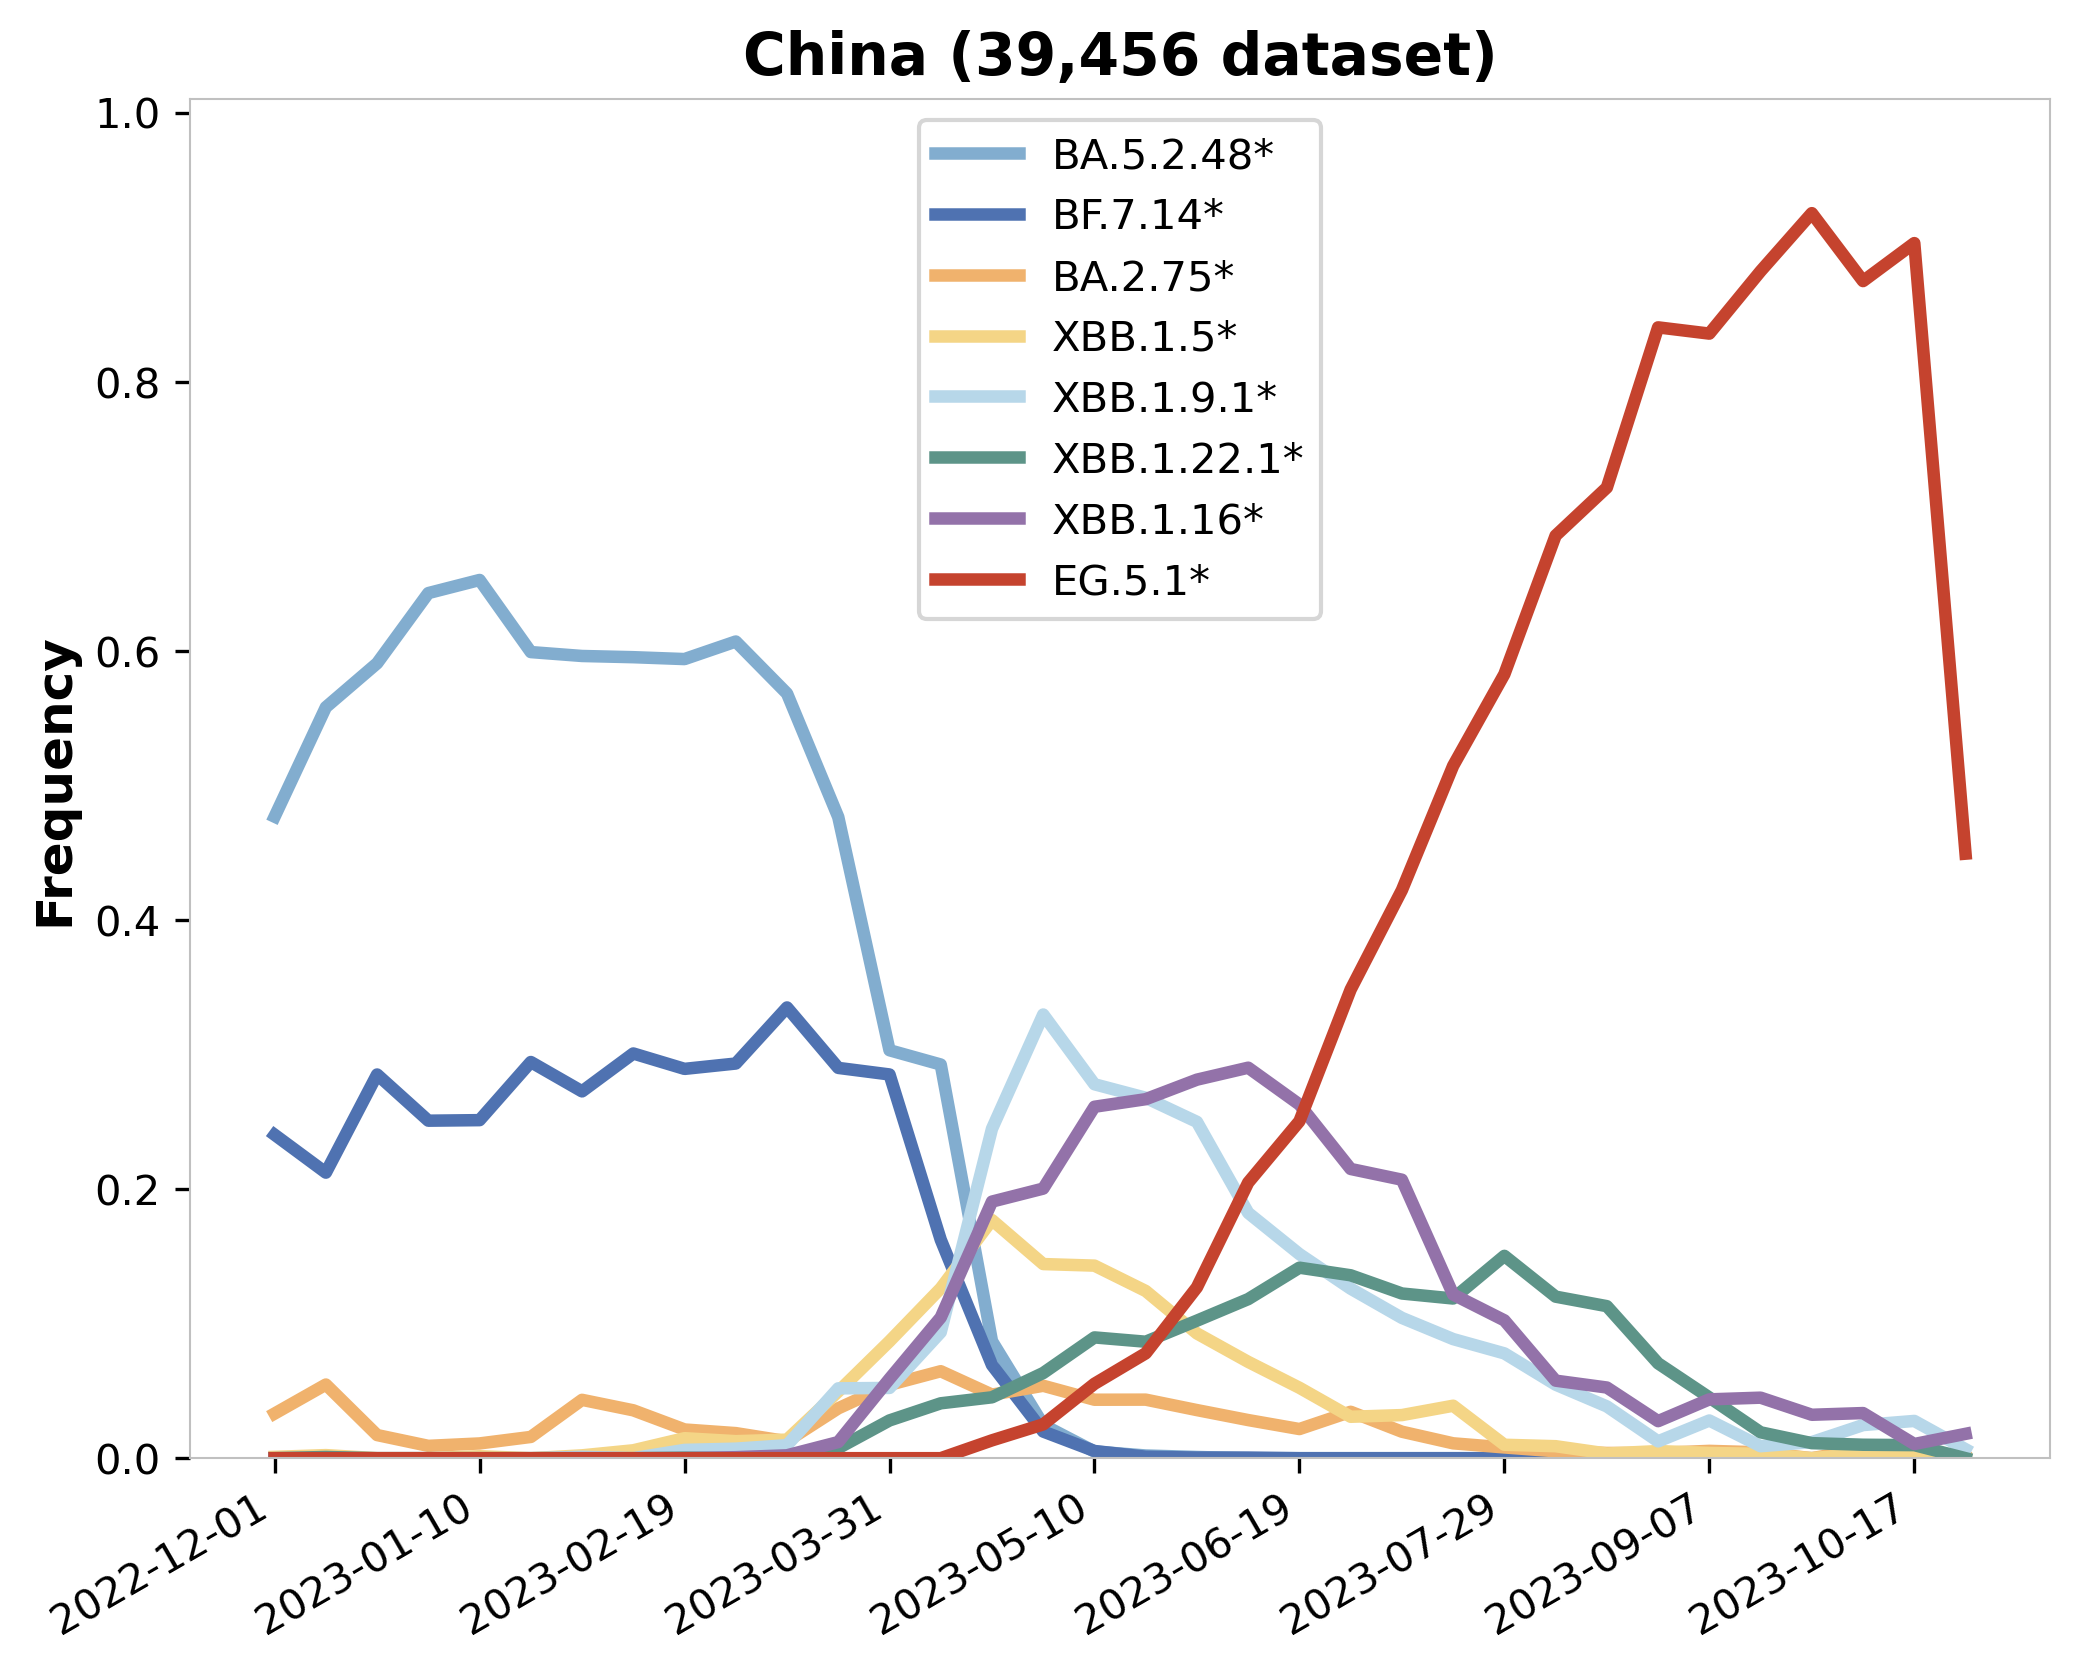

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

# colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
colors = [ "#82ADCF","#4F72B1","#F0B26D","#F4D586","#B7D7E9","#5D9488","#9372A9","#C5432E"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)
k1 = array(df_prop_week[df_prop_week["variant"] == top8_lin[0]]["proportion"].tolist())
k2 = array(df_prop_week[df_prop_week["variant"] == top8_lin[1]]["proportion"].tolist())
k3 = array(df_prop_week[df_prop_week["variant"] == top8_lin[2]]["proportion"].tolist())
k4 = array(df_prop_week[df_prop_week["variant"] == top8_lin[3]]["proportion"].tolist())
k5 = array(df_prop_week[df_prop_week["variant"] == top8_lin[4]]["proportion"].tolist())
k6 = array(df_prop_week[df_prop_week["variant"] == top8_lin[5]]["proportion"].tolist())
k7 = array(df_prop_week[df_prop_week["variant"] == top8_lin[6]]["proportion"].tolist())
k8 = array(df_prop_week[df_prop_week["variant"] == top8_lin[7]]["proportion"].tolist())

plt.plot(x,k1,'-',color = colors[0],label=top8_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top8_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top8_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top8_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top8_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top8_lin[5],linewidth=3.0)
plt.plot(x,k7,'-',color = colors[6],label=top8_lin[6],linewidth=3.0)
plt.plot(x,k8,'-',color = colors[7],label=top8_lin[7],linewidth=3.0)

plt.title("China (39,456 dataset)",fontweight = "bold",size = 14)
plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top8_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  
plt.savefig(output_path+"world_covspectrum/Top8_china_"+str(date_intervals_day)+"day.pdf")


In [ ]:
# https://cov-spectrum.org/explore/World/，登陆cov-spectrum网站，下载上述8个谱系的在世界的流行频率文件"VariantComparisonTimeDistributionPlot_world.csv"

In [69]:
cov_world = pd.read_csv(output_path+"world_covspectrum/VariantComparisonTimeDistributionPlot_world.csv")
df_world = cov_world.drop(['proportionCILow', 'proportionCIHigh'], axis=1)
for i in df_world.index:
    df_world.loc[i,"variant_short"] = df_world.loc[i,"variant"].split("(")[0].strip()

df_world_final = pd.DataFrame(columns=["date","proportion","variant"])
df_world_final["date"]  = df_world["date"]
df_world_final["proportion"]  = df_world["proportion"]
df_world_final["variant"]  = df_world["variant_short"]
df_world_final.to_csv(output_path+"world_covspectrum/Top8_world_covspectrum.csv",index = None)
df_world_final

date  proportion      variant
0     2022-12-03    0.007541   BA.5.2.48*
1     2022-12-03    0.003742     BF.7.14*
2     2022-12-03    0.092216     BA.2.75*
3     2022-12-03    0.010486     XBB.1.5*
4     2022-12-03    0.000045   XBB.1.9.1*
...          ...         ...          ...
2619  2023-10-26    0.103355     XBB.1.5*
2620  2023-10-26    0.076649   XBB.1.9.1*
2621  2023-10-26    0.009931  XBB.1.22.1*
2622  2023-10-26    0.117480    XBB.1.16*
2623  2023-10-26    0.508436      EG.5.1*

[2624 rows x 3 columns]

In [70]:
dstart, dend = df_world_final['date'].sort_values().values[0], df_world_final['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_world_final_week = pd.DataFrame(columns=["date","proportion","variant"])
df_world_final_week.date = [val for val in date_intervals_top4 for i in range(len(top8_lin))]
df_world_final_week.variant = top8_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
    for lin in top8_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_world_final_week.index:
            if df_world_final_week.loc[i,"variant"] == lin and df_world_final_week.loc[i,"date"] == date_intervals_top4[n]:
                df_world_final_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

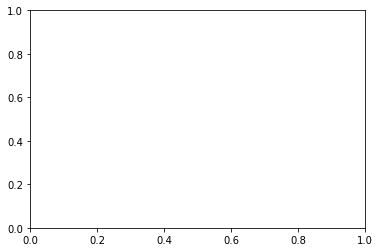

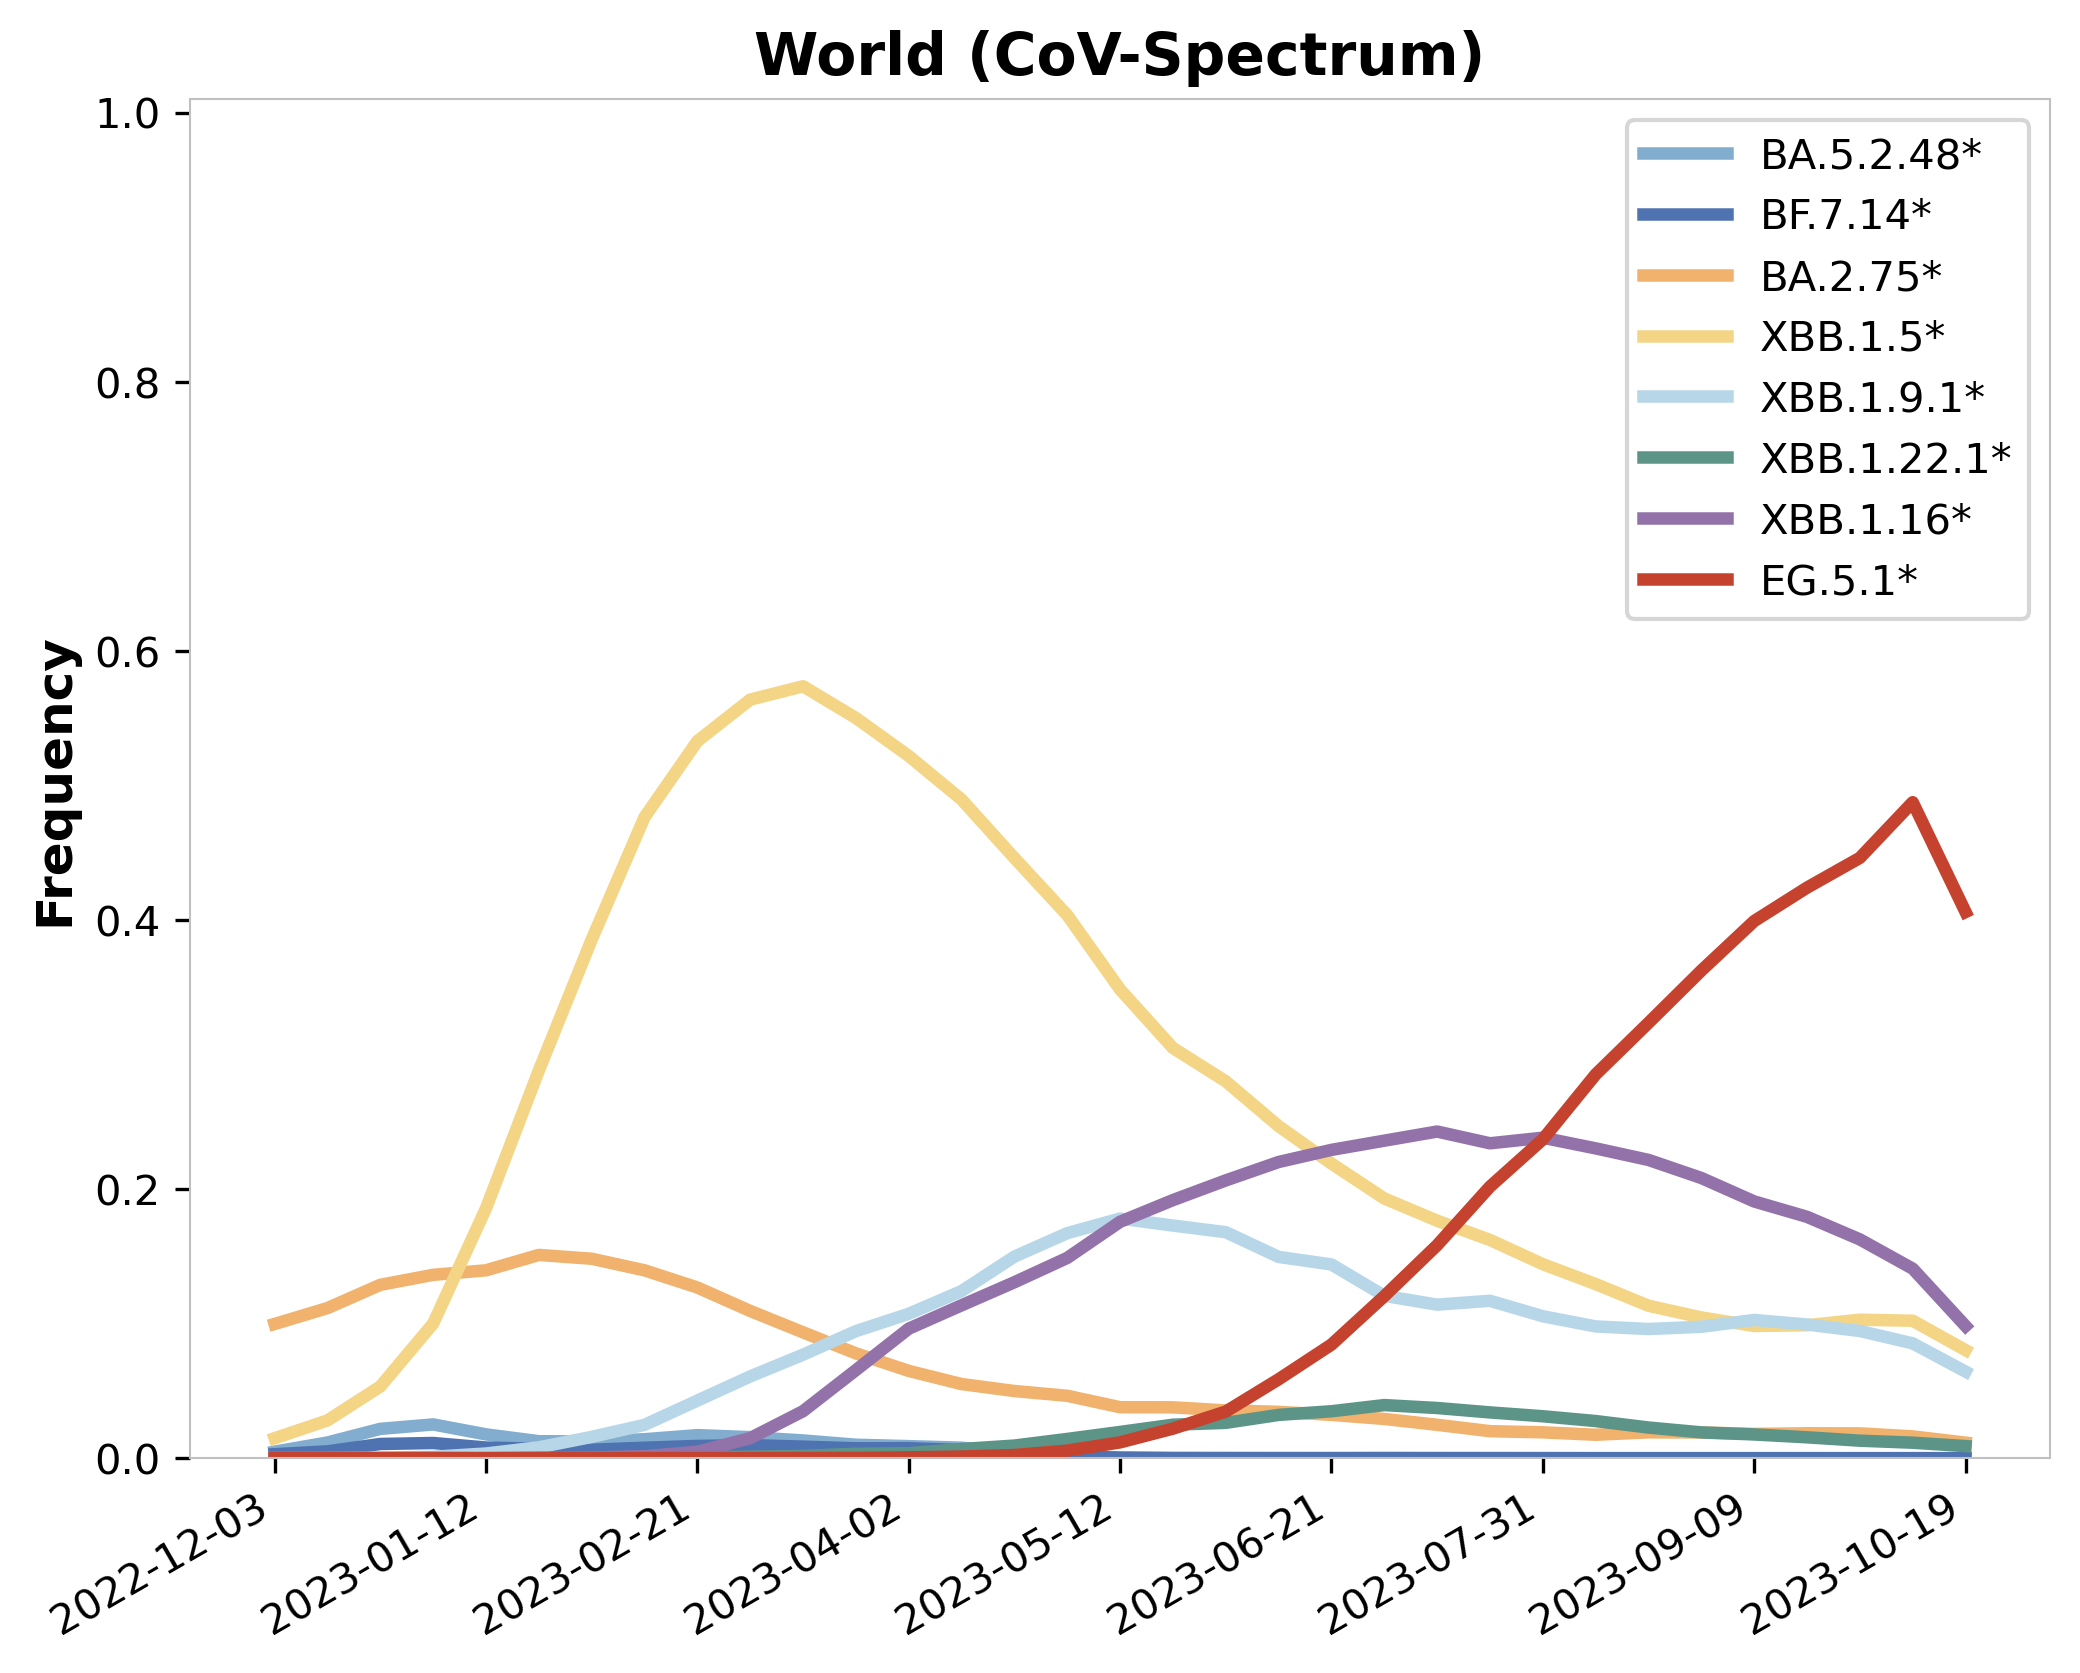

In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

# colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
colors = [ "#82ADCF","#4F72B1","#F0B26D","#F4D586","#B7D7E9","#5D9488","#9372A9","#C5432E"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)
k1 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[0]]["proportion"].tolist())
k2 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[1]]["proportion"].tolist())
k3 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[2]]["proportion"].tolist())
k4 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[3]]["proportion"].tolist())
k5 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[4]]["proportion"].tolist())
k6 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[5]]["proportion"].tolist())
k7 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[6]]["proportion"].tolist())
k8 = array(df_world_final_week[df_world_final_week["variant"] == top8_lin[7]]["proportion"].tolist())

plt.plot(x,k1,'-',color = colors[0],label=top8_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top8_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top8_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top8_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top8_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top8_lin[5],linewidth=3.0)
plt.plot(x,k7,'-',color = colors[6],label=top8_lin[6],linewidth=3.0)
plt.plot(x,k8,'-',color = colors[7],label=top8_lin[7],linewidth=3.0)


plt.title("World (CoV-Spectrum)",fontweight = "bold",size = 14)

plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top8_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  
plt.savefig(output_path+"world_covspectrum/Top8_world_covspectrum_"+str(date_intervals_day)+"days.pdf")


In [ ]:
# https://cov-spectrum.org/explore/World/，登陆cov-spectrum网站，下载上述8个谱系在中国的流行频率文件"VariantComparisonTimeDistributionPlot_china.csv"

In [72]:
cov_china = pd.read_csv(output_path+"world_covspectrum/VariantComparisonTimeDistributionPlot_china.csv")
df_china = cov_china.drop(['proportionCILow', 'proportionCIHigh'], axis=1)
for i in df_china.index:
    df_china.loc[i,"variant_short"] = df_china.loc[i,"variant"].split("(")[0].strip()

df_china_final = pd.DataFrame(columns=["date","proportion","variant"])
df_china_final["date"]  = df_china["date"]
df_china_final["proportion"]  = df_china["proportion"]
df_china_final["variant"]  = df_china["variant_short"]
df_china_final.to_csv(output_path+"world_covspectrum/Top8_china_covspectrum.csv",index = None)
df_china_final

date  proportion      variant
0     2022-12-03    0.552040   BA.5.2.48*
1     2022-12-03    0.273106     BF.7.14*
2     2022-12-03    0.017485     BA.2.75*
3     2022-12-03    0.000000     XBB.1.5*
4     2022-12-03    0.000000   XBB.1.9.1*
...          ...         ...          ...
2619  2023-10-26    0.004115     XBB.1.5*
2620  2023-10-26    0.014403   XBB.1.9.1*
2621  2023-10-26    0.000000  XBB.1.22.1*
2622  2023-10-26    0.016461    XBB.1.16*
2623  2023-10-26    0.950617      EG.5.1*

[2624 rows x 3 columns]

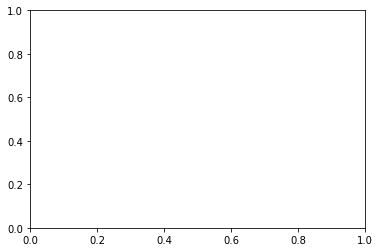

In [73]:
dstart, dend = df_china_final['date'].sort_values().values[0], df_china_final['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_china_final_week = pd.DataFrame(columns=["date","proportion","variant"])
df_china_final_week.date = [val for val in date_intervals_top4 for i in range(len(top8_lin))]
df_china_final_week.variant = top8_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_china_final[df_china_final['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_china_final[df_china_final['date'] >= date_intervals_top4[n]]
    for lin in top8_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_china_final_week.index:
            if df_china_final_week.loc[i,"variant"] == lin and df_china_final_week.loc[i,"date"] == date_intervals_top4[n]:
                df_china_final_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

# colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
# colors = [ "#82ADCF","#4F72B1","#F0B26D","#F4D586","#B7D7E9","#5D9488","#9372A9","#C5432E"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)#点的横坐标
k1 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[0]]["proportion"].tolist())
k2 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[1]]["proportion"].tolist())
k3 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[2]]["proportion"].tolist())
k4 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[3]]["proportion"].tolist())
k5 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[4]]["proportion"].tolist())
k6 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[5]]["proportion"].tolist())
k7 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[6]]["proportion"].tolist())
k8 = array(df_china_final_week[df_china_final_week["variant"] == top8_lin[7]]["proportion"].tolist())

plt.plot(x,k1,'-',color = colors[0],label=top8_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top8_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top8_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top8_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top8_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top8_lin[5],linewidth=3.0)
plt.plot(x,k7,'-',color = colors[6],label=top8_lin[6],linewidth=3.0)
plt.plot(x,k8,'-',color = colors[7],label=top8_lin[7],linewidth=3.0)

plt.title("China (CoV-Spectrum)",fontweight = "bold",size = 14)
plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top8_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  

plt.savefig(output_path+"world_covspectrum/Top8_China_covspectrum_"+str(date_intervals_day)+"days.pdf")
